# Proyek Analisis Data: E-Commerce Public Dataset (Sumber)
- **Nama:** Permata Ayu Rahmawati
- **Email:** permathaayu21@gmail
- **ID Dicoding:** permatayra

## Menentukan Pertanyaan Bisnis


- Produk apa yang memiliki jumlah penjualan tertinggi dalam periode yang tersedia di data penjualan??
- Apakah terdapat perbedaan rata-rata nilai pesanan berdasarkan metode pembayaran (misalnya kartu kredit, transfer bank, atau e-wallet) di data yang tersedia?
- Bagaimana pengaruh lokasi pelanggan (misalnya kota atau provinsi) terhadap rata-rata waktu pengiriman berdasarkan data yang tersedia?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import geopandas as gpd
import folium
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"permataa","key":"9c4656619367c8cb34b2b23c3741926e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 75% 32.0M/42.6M [00:00<00:00, 169MB/s]
100% 42.6M/42.6M [00:00<00:00, 183MB/s]


In [5]:
with zipfile.ZipFile('/content/brazilian-ecommerce.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [6]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocations_df = pd.read_csv('olist_geolocation_dataset.csv')
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
items_df = pd.read_csv('olist_order_items_dataset.csv')
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
payments_df = pd.read_csv('olist_order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
orders_df = pd.read_csv('olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
products_df = pd.read_csv('olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
category_df = pd.read_csv('product_category_name_translation.csv')
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [15]:
#table items_df
items_df.info()

items_df.isna().sum()

print("Jumlah duplikasi: ", items_df.duplicated().sum())
items_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [16]:
#table reviews_df
reviews_df.info()

reviews_df.isna().sum()

print("Jumlah duplikasi: ", reviews_df.duplicated().sum())
reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
#table orders_df
orders_df.info()

orders_df.isna().sum()

print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [18]:
#table products_df
products_df.info()

products_df.isna().sum()

print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [19]:
#table geolocations_df
geolocations_df.info()

geolocations_df.isna().sum()

print("Jumlah duplikasi: ", geolocations_df.duplicated().sum())
geolocations_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [20]:
#table sellers_df
sellers_df.info()

sellers_df.isna().sum()

print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [21]:
#table payments_df
payments_df.info()

payments_df.isna().sum()

print("Jumlah duplikasi: ", payments_df.duplicated().sum())
payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
#table customers_df
customers_df.info()

customers_df.isna().sum()

print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [23]:
#table category_df
category_df.info()

category_df.isna().sum()

print("Jumlah duplikasi: ", category_df.duplicated().sum())
category_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Data Null
  1. Terdapat data null pada tabel df reviews_df(reviews_comment_title, review_comment_message)
  2. Terdapat data null pada tabel df orders_df(order_approved_at,order_delivered_carrier_date, order_delivered_customer_date )
  3. Terdapat data null pada tabel df products_df(product_category_name,        
  product_name_lenght,          
  product_description_lenght,
  product_photos_qty  )

- Data Duplikat
  1. Terdapat data duplikat pada geolocation

### Cleaning Data

Mengidentifikasi data yang hilang df reviews_df(review_comment_title)

In [24]:
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [25]:
reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


Mengidentifikasi data yang hilang9 df reviews_df(review_comment_message)

In [26]:
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [27]:
reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [28]:
reviews_df.fillna(value='no comment', inplace=True)

Mengidentifikasi data yang hilang df orders_df(order_approved_at)

In [29]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [30]:
orders_df = orders_df.copy()
orders_df['order_approved_at'] = orders_df['order_approved_at'].ffill()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].bfill()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].bfill()

In [31]:
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

In [32]:
geolocations_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

In [33]:
# Gabungkan data
merged_items = items_df.merge(products_df, on='product_id')

# Hitung produk terlaris
top_products = merged_items.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False).head(10)

# Tampilkan data EDA
print("10 Produk Terlaris:")
print(top_products)

10 Produk Terlaris:
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: order_item_id, dtype: int64


In [34]:
# Gabungkan data
merged_payments = payments_df.merge(items_df, on='order_id')

# Analisis rata-rata nilai pesanan
avg_payment = merged_payments.groupby('payment_type')['price'].mean().sort_values(ascending=False)

# Tampilkan data EDA
print("Rata-rata Nilai Pesanan per Metode Pembayaran:")
print(avg_payment)

Rata-rata Nilai Pesanan per Metode Pembayaran:
payment_type
credit_card    126.477858
debit_card     108.668681
voucher        105.112152
boleto         104.584146
Name: price, dtype: float64


In [35]:
# Gabungkan data
customers_orders = customers_df.merge(orders_df, on='customer_id')
customers_orders['shipping_time'] = pd.to_datetime(customers_orders['order_delivered_customer_date']) - pd.to_datetime(customers_orders['order_purchase_timestamp'])

# Analisis waktu pengiriman per lokasi
avg_shipping_time = customers_orders.groupby('customer_state')['shipping_time'].mean()

# Tampilkan data EDA
print("Rata-rata Waktu Pengiriman per Lokasi Pelanggan:")
print(avg_shipping_time)

Rata-rata Waktu Pengiriman per Lokasi Pelanggan:
customer_state
AC   24 days 09:15:03.728395061
AL   29 days 06:45:09.087167070
AM   29 days 11:20:22.641891892
AP   29 days 15:49:16.823529412
BA   20 days 12:43:01.836982248
CE   20 days 22:05:51.375748503
DF   15 days 12:44:10.300934579
ES   17 days 07:36:58.417609444
GO   17 days 03:36:24.343069307
MA   23 days 07:41:49.159303882
MG   13 days 19:23:45.440309411
MS   17 days 08:30:08.862937063
MT   19 days 15:31:40.549062844
PA   25 days 10:01:33.438974359
PB   23 days 11:54:53.287313432
PE   20 days 01:07:47.578692494
PI   21 days 04:53:06.862626262
PR   13 days 00:55:55.457086224
RJ   17 days 07:14:45.727591036
RN   18 days 08:26:07.175257732
RO   20 days 10:54:59.083003952
RR   28 days 12:18:23.608695652
RS   17 days 05:13:29.993779729
SC   17 days 13:18:17.026670332
SE   21 days 17:14:23.442857142
SP   10 days 02:54:18.742466344
TO   18 days 22:18:35.742857142
Name: shipping_time, dtype: timedelta64[ns]


In [44]:
# Gabungkan dataset setelah proses EDA
all_data = items_df.merge(products_df, on='product_id')
all_data = all_data.merge(orders_df, on='order_id')
all_data = all_data.merge(customers_df, on='customer_id')
all_data = all_data.merge(sellers_df, on='seller_id')
all_data = all_data.merge(payments_df, on='order_id')

# Menyimpan ke file all_data.csv
all_data.to_csv('all_data.csv', index=False)

print("Dataset setelah proses EDA berhasil disimpan ke all_data.csv!")


Dataset setelah proses EDA berhasil disimpan ke all_data.csv!


In [54]:
# from google.colab import files
# files.download('all_data.csv')

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1:Produk apa yang memiliki jumlah penjualan tertinggi dalam periode yang tersedia di data penjualan?

<ipython-input-38-02c98e64dcf6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


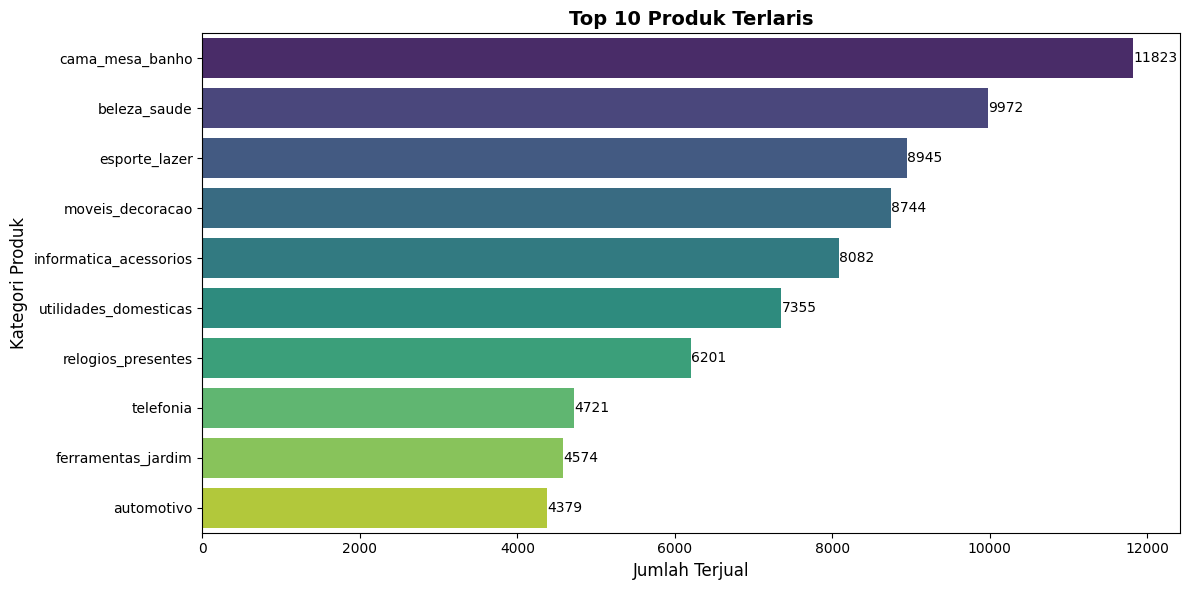

In [38]:
# Visualisasi 1: Produk Terlaris
top_products = all_data.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Produk Terlaris', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Terjual', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
for index, value in enumerate(top_products.values):
    plt.text(value + 5, index, str(value), va='center')
plt.tight_layout()
plt.show()

### Pertanyaan 2:Apakah terdapat perbedaan rata-rata nilai pesanan berdasarkan metode pembayaran (misalnya kartu kredit, transfer bank, atau e-wallet) di data yang tersedia?

<ipython-input-39-03744b73ea92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_payment.index, y=avg_payment.values, palette='coolwarm')


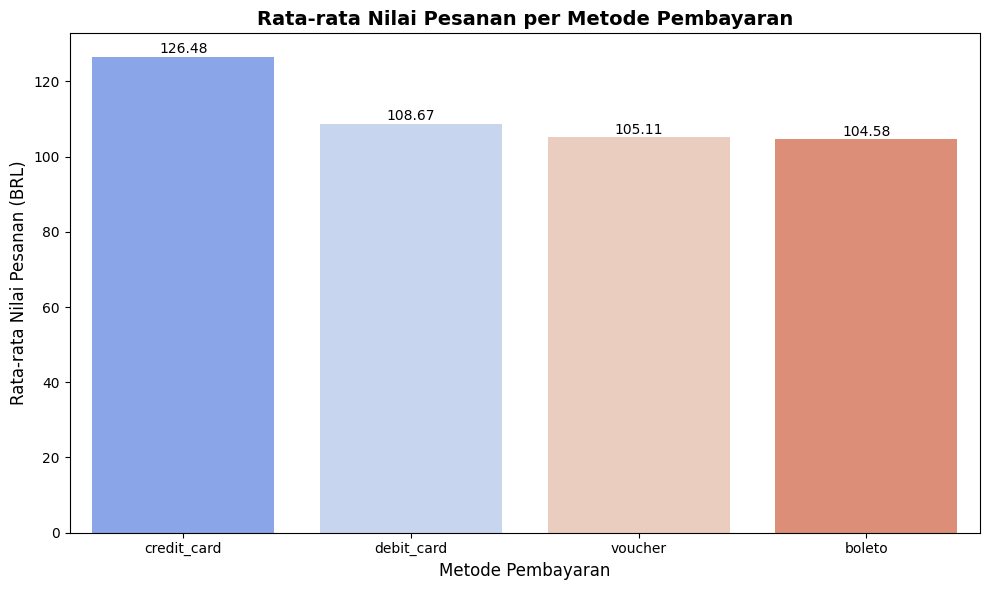

In [39]:
avg_payment = all_data.groupby('payment_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_payment.index, y=avg_payment.values, palette='coolwarm')
plt.title('Rata-rata Nilai Pesanan per Metode Pembayaran', fontsize=14, fontweight='bold')
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Rata-rata Nilai Pesanan (BRL)', fontsize=12)
for index, value in enumerate(avg_payment.values):
    plt.text(index, value + 1, f'{value:.2f}', ha='center')
plt.tight_layout()
plt.show()

### Pertanyaan 3:Bagaimana pengaruh lokasi pelanggan (misalnya kota atau provinsi) terhadap rata-rata waktu pengiriman berdasarkan data yang tersedia?

<ipython-input-45-88ba808df8f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_shipping_time.index, y=avg_shipping_time.values, palette='Blues_d')


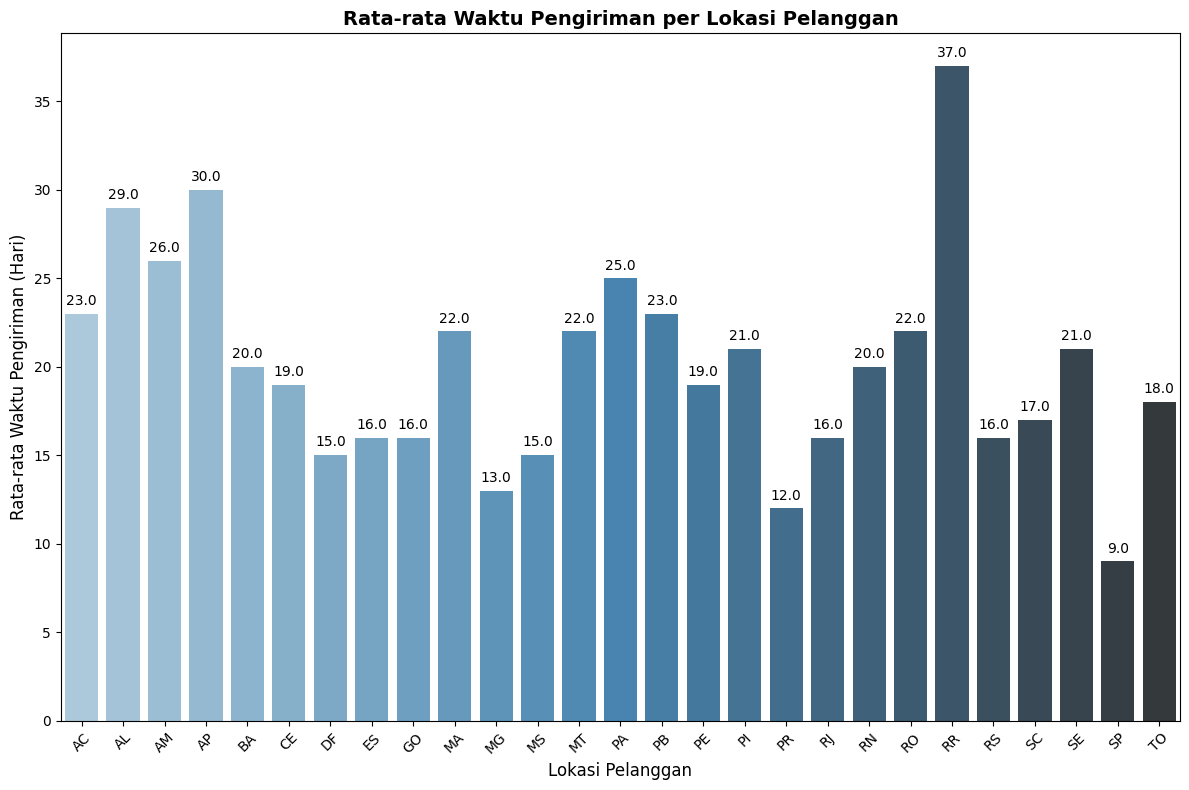

In [45]:
all_data['shipping_time'] = pd.to_datetime(all_data['order_delivered_customer_date']) - pd.to_datetime(all_data['order_purchase_timestamp'])
avg_shipping_time = all_data.groupby('customer_state')['shipping_time'].mean().dt.days

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_shipping_time.index, y=avg_shipping_time.values, palette='Blues_d')
plt.title('Rata-rata Waktu Pengiriman per Lokasi Pelanggan', fontsize=14, fontweight='bold')
plt.xlabel('Lokasi Pelanggan', fontsize=12)
plt.ylabel('Rata-rata Waktu Pengiriman (Hari)', fontsize=12)
for index, value in enumerate(avg_shipping_time.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis Lanjutan

In [48]:
print(all_data.columns)


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
all_data = pd.read_csv("all_data.csv")

# ---- RFM ANALYSIS ----
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
latest_date = all_data['order_purchase_timestamp'].max()

rfm = all_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Recency menggunakan qcut
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Handling Frequency
if rfm['Frequency'].nunique() > 1:
    try:
        rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
    except ValueError:
        rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])  # Alternatif jika qcut gagal
else:
    rfm['F_Score'] = 1  # Jika semua nilai Frequency sama, beri skor default

# Handling Monetary
if rfm['Monetary'].nunique() > 1:
    try:
        rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')
    except ValueError:
        rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])  # Alternatif jika qcut gagal
else:
    rfm['M_Score'] = 1  # Jika semua nilai Monetary sama, beri skor default

# Hitung total RFM Score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Simpan hasil ke CSV
rfm.to_csv("rfm_analysis.csv", index=True)



In [55]:
from google.colab import files
files.download('rfm_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

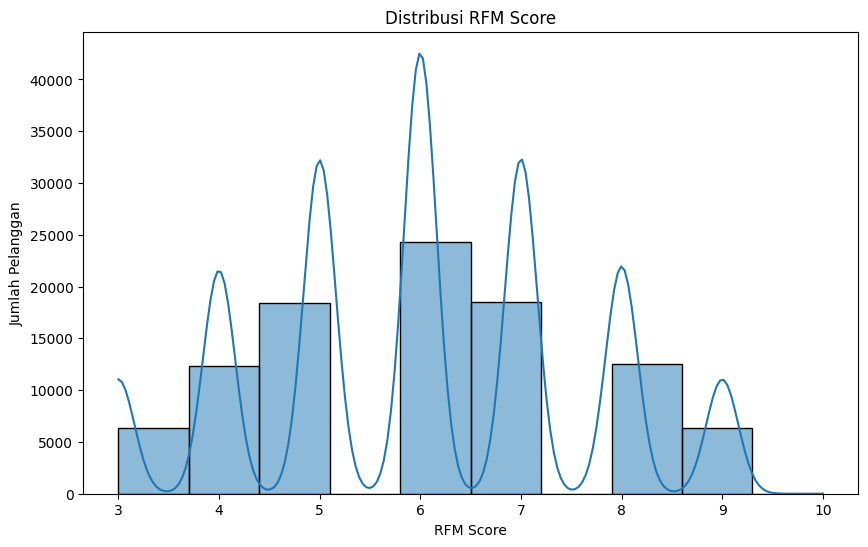

In [53]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(rfm['RFM_Score'], bins=10, kde=True)
plt.title("Distribusi RFM Score")
plt.xlabel("RFM Score")
plt.ylabel("Jumlah Pelanggan")
plt.show()


# Conclusion

##Conclusion pertanyaan 1 -> Produk apa yang memiliki jumlah penjualan tertinggi dalam periode yang tersedia di data penjualan? :

Produk yang paling banyak terjual berasal dari kategori "cama_mesa_banho", diikuti oleh kategori "beleza_saude" dan "esporte_lazer". Hal ini menunjukkan bahwa kebutuhan pelanggan cenderung berfokus pada keperluan rumah tangga serta produk kecantikan dan kesehatan. Perusahaan dapat memanfaatkan data ini untuk mengoptimalkan stok dan strategi pemasaran pada kategori-kategori tersebut untuk meningkatkan penjualan lebih lanjut.



#Conclusion pertanyaan 2 -> Apakah terdapat perbedaan rata-rata nilai pesanan berdasarkan metode pembayaran (misalnya kartu kredit, transfer bank, atau e-wallet) di data yang tersedia?

Pengaruh Metode Pembayaran terhadap Nilai Pesanan:

Dari visualisasi, terlihat bahwa kartu kredit (credit_card) memiliki rata-rata nilai pesanan yang lebih tinggi dibandingkan metode pembayaran lainnya (debit_card, voucher, dan boleto).
Hal ini menunjukkan bahwa metode pembayaran memang memiliki pengaruh terhadap nilai pesanan, di mana metode tertentu (seperti kartu kredit) cenderung digunakan untuk pembelian dengan nilai lebih besar.

Perbedaan Antara Metode Pembayaran:

Debit_card, voucher, dan boleto memiliki rata-rata nilai pesanan yang lebih rendah dibandingkan kartu kredit, dan perbedaannya cukup konsisten.
Ini dapat mengindikasikan bahwa pelanggan yang memilih metode pembayaran ini lebih sering berbelanja dengan jumlah yang lebih kecil.


Faktor yang Mungkin Berkontribusi:

Kartu kredit menawarkan fleksibilitas pembayaran (misalnya cicilan), sehingga pelanggan lebih nyaman untuk melakukan pembelian bernilai besar.
Metode seperti boleto dan voucher mungkin lebih sering digunakan untuk pembelian bernilai kecil karena sifatnya yang berbasis tunai atau non-kredit.

#Conclusion pertanyaan 3 -> Bagaimana pengaruh lokasi pelanggan (misalnya kota atau provinsi) terhadap rata-rata waktu pengiriman berdasarkan data yang tersedia?
Ya, lokasi pelanggan secara signifikan memengaruhi waktu pengiriman. Wilayah dengan akses logistik yang sulit atau jarak yang jauh dari pusat distribusi cenderung memiliki waktu pengiriman yang lebih lama. Perusahaan dapat menggunakan data ini untuk mengoptimalkan distribusi logistik, seperti mendirikan pusat distribusi di wilayah dengan waktu pengiriman yang tinggi untuk meningkatkan efisiensi.


## Conclusion Analisis RFM

1. Pelanggan Loyal → Sering belanja, baru transaksi, dan mengeluarkan banyak uang. Perlu dipertahankan dengan reward atau promo eksklusif.

2. Pelanggan Berpotensi → Cukup sering belanja tapi belum maksimal. Bisa didorong dengan diskon atau program referral.

3. Pelanggan Tidak Aktif → Sudah lama tidak belanja atau hanya sekali beli. Perlu strategi reaktivasi seperti email marketing atau promo khusus.

4. Sebagian besar pendapatan mungkin berasal dari pelanggan tertentu → Fokus mempertahankan mereka dan mendorong pelanggan lain untuk lebih sering bertransaksi.